[View in Colaboratory](https://colab.research.google.com/github/peaelle42/DNN_jump_start/blob/master/JS03_Keras_callbacks.ipynb)

## Testing for GPU
To Test if you have GPU set up

Run the Cell below

if no GPU is found press Runtime (in the menu at the top) and choose "Change Runtime Type" to GPU

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Keras Callbacks

This is to show implementations of Keras Callbacks and how to use them

- Basic History and plotting  
- Model checkpoints  
- Early Stopping  
- Learning Rate Scheduler  
- ReduceLROnPlateau  
- LambdaCallback
- Custom Callback  

### Set up a model

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, TensorBoard
from keras.callbacks import LambdaCallback
from keras import backend as K

import tensorflow as tf



In [5]:
print(keras.__version__)
print(tf.__version__)

2.1.6
1.9.0-rc2


In [6]:
batch_size = 128
num_classes = 10
epochs = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,),name='Dense1'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu',name='Dense2'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Basic History and ploting

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=2,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 4s - loss: 0.2464 - acc: 0.9237 - val_loss: 0.1060 - val_acc: 0.9673
Epoch 2/5
 - 3s - loss: 0.1039 - acc: 0.9679 - val_loss: 0.0938 - val_acc: 0.9715
Epoch 3/5
 - 3s - loss: 0.0754 - acc: 0.9767 - val_loss: 0.0794 - val_acc: 0.9760
Epoch 4/5
 - 3s - loss: 0.0608 - acc: 0.9819 - val_loss: 0.0691 - val_acc: 0.9797
Epoch 5/5
 - 3s - loss: 0.0510 - acc: 0.9850 - val_loss: 0.0718 - val_acc: 0.9807
Test loss: 0.07180944553018781
Test accuracy: 0.9807


In [0]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

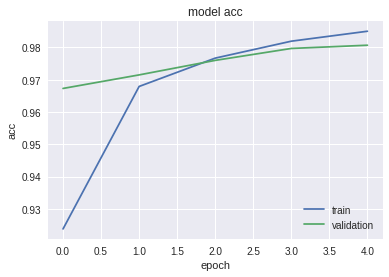

In [12]:
plot_train(history)

### Model Checkpoints

args 
- filepath - str  can use formating to put epoch number etc {epoc}
- monitor - qunatity to monitor  
- verbose - 0 or 1  
- save_best_only - only save if better than before  
- mode - use 'auto'  
- save_weights_only - if false then will save whole model
- period - the interval between epochs  

In [13]:
!mkdir checkpoints
!ls

cats-dogs.hdf5	checkpoints  data  datalab  gdrive.py  __pycache__  sutils.py


In [0]:
checkpoint = ModelCheckpoint('./checkpoints/weights_{epoch:02d}_{val_acc:.2f}.hdf5', verbose=1, save_best_only=True, mode='auto')

In [15]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint])


Epoch 00001: val_loss improved from inf to 0.08551, saving model to ./checkpoints/weights_01_0.98.hdf5

Epoch 00002: val_loss improved from 0.08551 to 0.07574, saving model to ./checkpoints/weights_02_0.98.hdf5

Epoch 00003: val_loss did not improve from 0.07574

Epoch 00004: val_loss did not improve from 0.07574

Epoch 00005: val_loss did not improve from 0.07574

Epoch 00006: val_loss did not improve from 0.07574

Epoch 00007: val_loss did not improve from 0.07574

Epoch 00008: val_loss did not improve from 0.07574

Epoch 00009: val_loss did not improve from 0.07574

Epoch 00010: val_loss did not improve from 0.07574


In [16]:
!mkdir logs
!ls

cats-dogs.hdf5	data	 gdrive.py  __pycache__
checkpoints	datalab  logs	    sutils.py


### Early Stopping - stop training when a monitored quanity has stopped improving
args
- monitor : what to monitor 'val_loss', 'acc'
- min_delta :minimum change to qualify as improvement
- patience : number of epocs with no improvement before you stop
- verbose : verbosity mode
- mode : 'auto' , can be 'min' or 'max' determines direction of improvement. Auto = based on monitor

In [0]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=0,verbose=0,mode='auto')

In [18]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.0212 - acc: 0.9944 - val_loss: 0.1050 - val_acc: 0.9841
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0204 - acc: 0.9945 - val_loss: 0.0997 - val_acc: 0.9833
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0204 - acc: 0.9948 - val_loss: 0.1194 - val_acc: 0.9818


above stopped after 3 epochs instead of 10 as validation loss didn't get better

### Learning Rate Scheduler
arg
- schedule - this will be function that takes epoch number(int) and returns new Learning Rate (float) 

#### LearningRate = InitialLearningRate * DropRate^floor(Epoch / EpochDrop)

In [0]:
import math

# learning rate schedule for dropping every 10 epochs
def LRDropping(epoch_hi_there):
    initial_lrate = 0.001
    drop = 0.9
    epochs_drop = 3.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch_hi_there)/epochs_drop))
    print(lrate)
    return lrate

In [38]:
LRDropping(56)

0.0001350851717672993


0.0001350851717672993

In [0]:
LRDrop = LearningRateScheduler(LRDropping)

In [0]:
# def LRS(function):
#   epoch = ask_keras_epocj
#   function(epoch)

In [0]:
K.set_value(model.optimizer.lr,0.001)

In [34]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[LRDrop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
0.001
60000/60000 [==============================] - 3s 58us/step - loss: 0.0147 - acc: 0.9965 - val_loss: 0.1106 - val_acc: 0.9847
Epoch 2/10
0.001
60000/60000 [==============================] - 3s 57us/step - loss: 0.0159 - acc: 0.9960 - val_loss: 0.1150 - val_acc: 0.9847
Epoch 3/10
0.0009000000000000001
60000/60000 [==============================] - 3s 58us/step - loss: 0.0126 - acc: 0.9970 - val_loss: 0.1263 - val_acc: 0.9842
Epoch 4/10
0.0009000000000000001
60000/60000 [==============================] - 3s 57us/step - loss: 0.0124 - acc: 0.9970 - val_loss: 0.1242 - val_acc: 0.9840
Epoch 5/10
0.0009000000000000001
 6144/60000 [==>...........................] - ETA: 3s - loss: 0.0127 - acc: 0.9979

60000/60000 [==============================] - 3s 58us/step - loss: 0.0137 - acc: 0.9971 - val_loss: 0.1377 - val_acc: 0.9807
Epoch 6/10
0.0008100000000000001
60000/60000 [==============================] - 3s 57us/step - loss: 0.0090 - acc: 0.9977 - val_loss: 0.1259 - val_acc: 0.9844
Epoch 7/10
0.0008100000000000001
60000/60000 [==============================] - 3s 58us/step - loss: 0.0098 - acc: 0.9976 - val_loss: 0.1284 - val_acc: 0.9838
Epoch 8/10
0.0008100000000000001
60000/60000 [==============================] - 3s 57us/step - loss: 0.0109 - acc: 0.9977 - val_loss: 0.1400 - val_acc: 0.9835
Epoch 9/10
0.0007290000000000002
25088/60000 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.9985

60000/60000 [==============================] - 4s 58us/step - loss: 0.0072 - acc: 0.9984 - val_loss: 0.1251 - val_acc: 0.9855
Epoch 10/10
0.0007290000000000002
60000/60000 [==============================] - 3s 58us/step - loss: 0.0080 - acc: 0.9983 - val_loss: 0.1318 - val_acc: 0.9842


In [39]:
#print out the learning rate
print(K.eval(model.optimizer.lr))

0.000729


### ReduceLROnPlateau
args
- monitor : quality to be monitored eg. 'val_loss' , 'val_acc'
- factor : the factor by which the current LR be multiplied  
- patience : number of epochs with no improvement  
- verbose : 1 = update messages 0 nothing
- mode : 'auto'  eg. is improvment up or down 'min' 'max'
- epsilon : threshold for measuring the new optimum, to only focus on significant changes  
- cooldown :number of epochs to wait before any new changes
- min_lr: the lowest lr allowed 

In [0]:
reduce_LR = ReduceLROnPlateau(monitor='val_loss',factor = 0.9, patience=3,cooldown=2, min_lr = 0.00001)

In [41]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[reduce_LR])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0085 - acc: 0.9980 - val_loss: 0.1292 - val_acc: 0.9848
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0072 - acc: 0.9983 - val_loss: 0.1311 - val_acc: 0.9853
Epoch 3/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.0074 - acc: 0.9984 - val_loss: 0.1456 - val_acc: 0.9843
Epoch 4/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0068 - acc: 0.9984 - val_loss: 0.1386 - val_acc: 0.9834
Epoch 5/10
14464/60000 [======>.......................] - ETA: 2s - loss: 0.0073 - acc: 0.9987

60000/60000 [==============================] - 3s 58us/step - loss: 0.0065 - acc: 0.9986 - val_loss: 0.1299 - val_acc: 0.9848
Epoch 6/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.0057 - acc: 0.9986 - val_loss: 0.1385 - val_acc: 0.9850
Epoch 7/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0067 - acc: 0.9987 - val_loss: 0.1342 - val_acc: 0.9839
Epoch 8/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0054 - acc: 0.9987 - val_loss: 0.1324 - val_acc: 0.9849
Epoch 9/10
41472/60000 [===================>..........] - ETA: 1s - loss: 0.0049 - acc: 0.9989

60000/60000 [==============================] - 4s 59us/step - loss: 0.0052 - acc: 0.9989 - val_loss: 0.1417 - val_acc: 0.9841
Epoch 10/10
60000/60000 [==============================] - 4s 58us/step - loss: 0.0040 - acc: 0.9992 - val_loss: 0.1389 - val_acc: 0.9848


In [42]:
#print out the learning rate
print(K.eval(model.optimizer.lr))

0.00059049


### LambdaCallback a way to call anon functions in the callback
args
- on_epoch_being - called at begin of epoch -takes epoch,logs
- on_epoch_end - called at end of epoch -takes epoch,logs
- on_batch_begin _ called a begin of a batch -takes batch,logs
- on_batch_end :-takes epoch,logs
- on_train_begin - -takes logs
- on_train_end - -takes logs

In [0]:
lr_print = LambdaCallback(on_epoch_begin=lambda epoch,logs: print("lr:",K.eval(model.optimizer.lr)))

In [44]:
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_print,LRDrop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
lr: 0.00059049
0.001
60000/60000 [==============================] - 3s 52us/step - loss: 0.0095 - acc: 0.9980 - val_loss: 0.1407 - val_acc: 0.9833
Epoch 2/10
lr: 0.001
0.001
60000/60000 [==============================] - 3s 58us/step - loss: 0.0117 - acc: 0.9975 - val_loss: 0.1436 - val_acc: 0.9849
Epoch 3/10
lr: 0.001
0.0009000000000000001
60000/60000 [==============================] - 3s 58us/step - loss: 0.0113 - acc: 0.9977 - val_loss: 0.1314 - val_acc: 0.9848
Epoch 4/10
lr: 0.0009
0.0009000000000000001
57472/60000 [===========================>..] - ETA: 0s - loss: 0.0107 - acc: 0.9977

60000/60000 [==============================] - 3s 57us/step - loss: 0.0106 - acc: 0.9977 - val_loss: 0.1292 - val_acc: 0.9856
Epoch 5/10
lr: 0.0009
0.0009000000000000001
60000/60000 [==============================] - 3s 57us/step - loss: 0.0086 - acc: 0.9982 - val_loss: 0.1409 - val_acc: 0.9845
Epoch 6/10
lr: 0.0009
0.0008100000000000001
60000/60000 [==============================] - 3s 57us/step - loss: 0.0079 - acc: 0.9984 - val_loss: 0.1320 - val_acc: 0.9848
Epoch 7/10
lr: 0.00081
0.0008100000000000001
60000/60000 [==============================] - 3s 58us/step - loss: 0.0075 - acc: 0.9985 - val_loss: 0.1453 - val_acc: 0.9848
Epoch 8/10
lr: 0.00081
0.0008100000000000001
24448/60000 [===========>..................] - ETA: 2s - loss: 0.0084 - acc: 0.9982

60000/60000 [==============================] - 3s 58us/step - loss: 0.0081 - acc: 0.9982 - val_loss: 0.1464 - val_acc: 0.9828
Epoch 9/10
lr: 0.00081
0.0007290000000000002
60000/60000 [==============================] - 3s 58us/step - loss: 0.0078 - acc: 0.9984 - val_loss: 0.1352 - val_acc: 0.9841
Epoch 10/10
lr: 0.000729
0.0007290000000000002
60000/60000 [==============================] - 3s 57us/step - loss: 0.0067 - acc: 0.9986 - val_loss: 0.1381 - val_acc: 0.9850
